In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# give the datafile name
#datafile= 'all_words_pivot.xlsx'
datafile= 'C:\Users\elmasyr\Seafile\PW Project\PW Proj Shared Docs\data\matched word pivot files/78k_word_pivot.xlsx'

df = pd.read_excel(datafile, header=0, sep=',', encoding='utf-8', sheet_name='matchfreqfinnw_names')
#df = pd.read_excel(datafile, header=0, sep=',', encoding='utf-8')
df.info() # could also use df_final.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11749 entries, 0 to 11748
Data columns (total 8 columns):
matched word       11748 non-null object
freq in pws        11749 non-null int64
freq in web        11749 non-null int64
individual freq    11749 non-null int64
POS                11749 non-null object
analysis           11749 non-null object
finnish word       11749 non-null bool
finnish name       11749 non-null bool
dtypes: bool(2), int64(3), object(3)
memory usage: 573.8+ KB


In [2]:
df.head()

,matched word,freq in pws,freq in web,individual freq,POS,analysis,finnish word,finnish name
0,salasana,224,16553,16173,NOUN,Case=Nom|Number=Sing,True,False
1,perkele,167,13111,4304,NOUN,Case=Nom|Number=Sing,True,False
2,paska,121,21359,20343,NOUN,Case=Nom|Number=Sing,True,False
3,kakka,110,2820,2786,NOUN,Case=Nom|Number=Sing,True,False
4,qwerty,109,774,283,NOUN,Case=Nom|Number=Sing,False,False


In [3]:
# df['mypos'] = pd.DataFrame([str(val) for i, val in enumerate(df.POS)])
# df['myanalysis'] = pd.DataFrame([str(val) for i, val in enumerate(df.analysis)])
# df['mymy'] = df['mypos'] + ' ' +  df['myanalysis']

In [4]:
mypos = pd.DataFrame([str(val) for i, val in enumerate(df.POS)])
myanalysis = pd.DataFrame([str(val) for i, val in enumerate(df.analysis)])
df['label'] = mypos + ' ' +  myanalysis

In [5]:
df.head()

,matched word,freq in pws,freq in web,individual freq,POS,analysis,finnish word,finnish name,label
0,salasana,224,16553,16173,NOUN,Case=Nom|Number=Sing,True,False,NOUN Case=Nom|Number=Sing
1,perkele,167,13111,4304,NOUN,Case=Nom|Number=Sing,True,False,NOUN Case=Nom|Number=Sing
2,paska,121,21359,20343,NOUN,Case=Nom|Number=Sing,True,False,NOUN Case=Nom|Number=Sing
3,kakka,110,2820,2786,NOUN,Case=Nom|Number=Sing,True,False,NOUN Case=Nom|Number=Sing
4,qwerty,109,774,283,NOUN,Case=Nom|Number=Sing,False,False,NOUN Case=Nom|Number=Sing


In [6]:
mycols = ['label','freq in pws','freq in web']
df2 = df[mycols]

In [7]:
df2.head()

,label,freq in pws,freq in web
0,NOUN Case=Nom|Number=Sing,224,16553
1,NOUN Case=Nom|Number=Sing,167,13111
2,NOUN Case=Nom|Number=Sing,121,21359
3,NOUN Case=Nom|Number=Sing,110,2820
4,NOUN Case=Nom|Number=Sing,109,774


In [8]:
percentpws = (df2['freq in pws']/df2['freq in pws'].sum())*100
df2.insert(2, 'percent in pws', percentpws)

In [9]:
df2.head(3)

,label,freq in pws,percent in pws,freq in web
0,NOUN Case=Nom|Number=Sing,224,0.594843,16553
1,NOUN Case=Nom|Number=Sing,167,0.443477,13111
2,NOUN Case=Nom|Number=Sing,121,0.321321,21359


In [10]:
percentweb = df2['freq in pws']/df2['freq in web'].sum()*100
df2.insert(4, 'percent in web', percentweb)

In [11]:
df2['percent in web'].sum(), df2['percent in pws'].sum()

(0.022552141068783796, 100.0)

In [12]:
#df2['percent in web'] = df2['percent in web'].map(lambda x: '{0:.3}'.format(x))
# df2['percent in pws'] = df2['percent in pws'].map(lambda x: '{0:.2}'.format(x))

In [13]:
df2.head()

,label,freq in pws,percent in pws,freq in web,percent in web
0,NOUN Case=Nom|Number=Sing,224,0.594843,16553,0.000134
1,NOUN Case=Nom|Number=Sing,167,0.443477,13111,0.000100
2,NOUN Case=Nom|Number=Sing,121,0.321321,21359,0.000072
3,NOUN Case=Nom|Number=Sing,110,0.292110,2820,0.000066
4,NOUN Case=Nom|Number=Sing,109,0.289455,774,0.000065


In [14]:
dfa = df2.groupby(['label']).sum().sort_values(['freq in pws'],ascending=False)
dfw = df2.groupby(['label']).sum().sort_values(['freq in web'],ascending=False)

In [15]:
dfa.head()

,freq in pws,percent in pws,freq in web,percent in web
label,,,,
PROPN Case=Nom|Number=Sing,18063,47.967177,18343344,0.010818
NOUN Case=Nom|Number=Sing,11544,30.655655,27855260,0.006914
PROPN _,2455,6.519372,4517828,0.001470
PROPN Case=Gen|Number=Sing,848,2.251905,3003067,0.000508
ADJ Case=Nom|Degree=Pos|Number=Sing,564,1.497730,7662995,0.000338


In [16]:
dfa['percent in web'] = dfa['percent in web'].map(lambda x: '{0:.3}'.format(x))
dfa['percent in pws'] = dfa['percent in pws'].map(lambda x: '{0:.3}'.format(x))

In [17]:
dfa.head()

,freq in pws,percent in pws,freq in web,percent in web
label,,,,
PROPN Case=Nom|Number=Sing,18063,48.0,18343344,0.0108
NOUN Case=Nom|Number=Sing,11544,30.7,27855260,0.00691
PROPN _,2455,6.52,4517828,0.00147
PROPN Case=Gen|Number=Sing,848,2.25,3003067,0.000508
ADJ Case=Nom|Degree=Pos|Number=Sing,564,1.5,7662995,0.000338


In [18]:
df.sort_values(['freq in pws'],ascending=False).head()

,matched word,freq in pws,freq in web,individual freq,POS,analysis,finnish word,finnish name,label
0,salasana,224,16553,16173,NOUN,Case=Nom|Number=Sing,True,False,NOUN Case=Nom|Number=Sing
1,perkele,167,13111,4304,NOUN,Case=Nom|Number=Sing,True,False,NOUN Case=Nom|Number=Sing
2,paska,121,21359,20343,NOUN,Case=Nom|Number=Sing,True,False,NOUN Case=Nom|Number=Sing
3,kakka,110,2820,2786,NOUN,Case=Nom|Number=Sing,True,False,NOUN Case=Nom|Number=Sing
4,qwerty,109,774,283,NOUN,Case=Nom|Number=Sing,False,False,NOUN Case=Nom|Number=Sing


In [19]:
df[['matched word','freq in pws']][df['label']=='NOUN Case=Nom|Number=Sing'].sort_values(['freq in pws'],ascending=False).head()

,matched word,freq in pws
0,salasana,224
1,perkele,167
2,paska,121
3,kakka,110
4,qwerty,109


In [20]:
df[['matched word','freq in pws']][df['label']=='PROPN Case=Nom|Number=Sing'].sort_values(['freq in pws'],ascending=False).head()

,matched word,freq in pws
9,ville,76
12,antti,73
14,killer,69
15,sami,68
17,mikko,66


In [21]:
df[['matched word','freq in pws']][df['label']=='PROPN _'].sort_values(['freq in pws'],ascending=False).head()

,matched word,freq in pws
18,love,65
24,master,58
29,dragon,56
45,the,48
70,dark,38


In [22]:
df[['matched word','freq in pws']][df['label']=='PROPN Case=Gen|Number=Sing'].sort_values(['freq in pws'],ascending=False).head()

,matched word,freq in pws
10,man,75
149,pokemon,27
332,iron,16
516,batman,12
745,plan,9


In [23]:
df[['matched word','freq in pws']][df['label']=='PROPN Case=Gen|Number=Sing'].sort_values(['freq in pws'],ascending=False).sample(10)

,matched word,freq in pws
6985,moron,1
9136,saigon,1
11358,anskun,1
10000,aldin,1
8454,semin,1
1889,bermudan,4
5168,frozen,2
3610,katrin,2
10842,satin,1
4532,malkin,2


In [24]:
df[['matched word','freq in pws']][df['label']=='ADJ Case=Nom|Degree=Pos|Number=Sing'].sort_values(['freq in pws'],ascending=False).head()

,matched word,freq in pws
39,rakas,51
53,hullu,45
192,oma,23
193,salainen,23
264,musta,19


In [25]:
dfw.head()

,freq in pws,percent in pws,freq in web,percent in web
label,,,,
ADV _,290,0.770109,37083012,0.000174
NOUN Case=Nom|Number=Sing,11544,30.655655,27855260,0.006914
PROPN Case=Nom|Number=Sing,18063,47.967177,18343344,0.010818
VERB Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act,151,0.400988,8783623,0.000090
ADJ Case=Nom|Degree=Pos|Number=Sing,564,1.497730,7662995,0.000338


In [26]:
dfw['percent in web'] = dfw['percent in web'].map(lambda x: '{0:.3}'.format(x))
dfw['percent in pws'] = dfw['percent in pws'].map(lambda x: '{0:.3}'.format(x))

In [27]:
dfw.head()

,freq in pws,percent in pws,freq in web,percent in web
label,,,,
ADV _,290,0.77,37083012,0.000174
NOUN Case=Nom|Number=Sing,11544,30.7,27855260,0.00691
PROPN Case=Nom|Number=Sing,18063,48.0,18343344,0.0108
VERB Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act,151,0.401,8783623,9.04e-05
ADJ Case=Nom|Degree=Pos|Number=Sing,564,1.5,7662995,0.000338


In [28]:
df[['matched word','freq in pws']][df['label']=='PRON Case=Gen|Number=Sing|PronType=Dem'].sort_values(['freq in pws'],ascending=False).head()

,matched word,freq in pws
2498,sen,3


In [29]:
dfa.columns

Index([u'freq in pws', u'percent in pws', u'freq in web', u'percent in web'], dtype='object')

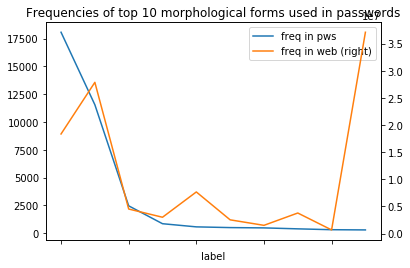

In [30]:
sample = 10
title = 'Frequencies of top ' + str(sample) + ' morphological forms used in passwords'
dfa['freq in pws'][:sample].plot(legend=True, title = title);
dfa['freq in web'][:sample].plot(secondary_y=True, legend=True);

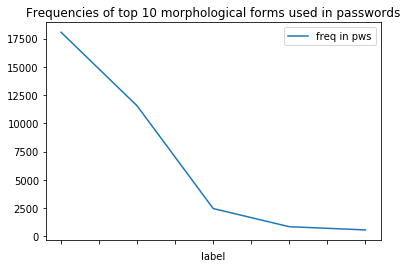

In [31]:
dfb = dfa[:5]
dfb.plot(y = 'freq in pws',x=dfb.index,legend=True, title = title);

In [32]:
dfsort = df.sort_values(['freq in pws'],ascending=False).reset_index(drop=True)

In [33]:
dfsort.head()

,matched word,freq in pws,freq in web,individual freq,POS,analysis,finnish word,finnish name,label
0,salasana,224,16553,16173,NOUN,Case=Nom|Number=Sing,True,False,NOUN Case=Nom|Number=Sing
1,perkele,167,13111,4304,NOUN,Case=Nom|Number=Sing,True,False,NOUN Case=Nom|Number=Sing
2,paska,121,21359,20343,NOUN,Case=Nom|Number=Sing,True,False,NOUN Case=Nom|Number=Sing
3,kakka,110,2820,2786,NOUN,Case=Nom|Number=Sing,True,False,NOUN Case=Nom|Number=Sing
4,qwerty,109,774,283,NOUN,Case=Nom|Number=Sing,False,False,NOUN Case=Nom|Number=Sing


In [34]:
dfsort['matched word'][:sample].values

array([u'salasana', u'perkele', u'paska', u'kakka', u'qwerty', u'koira',
       u'kissa', u'enkeli', u'nalle', u'ville'], dtype=object)

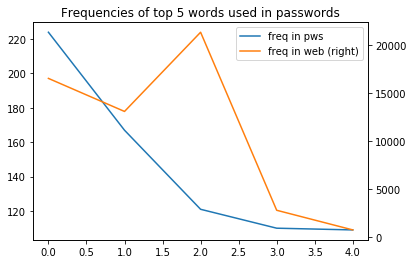

In [35]:
#https://stackoverflow.com/questions/11640243/pandas-plot-multiple-y-axes

sample = 5
title = 'Frequencies of top ' + str(sample) + ' words used in passwords'
x = [str(i) for i in dfsort['matched word'][:sample]]
dfsort['freq in pws'][:sample].plot(legend=True, title = title, x=x);
dfsort['freq in web'][:sample].plot(secondary_y=True, legend=True, sharex = True);


In [36]:
x

['salasana', 'perkele', 'paska', 'kakka', 'qwerty']

15 15


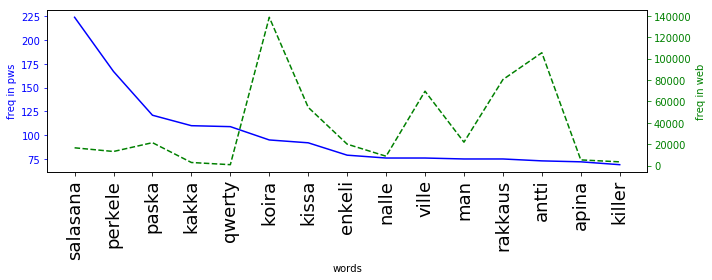

In [37]:
#https://matplotlib.org/gallery/api/two_scales.html

sample = 15

fig, ax1 = plt.subplots(figsize=(10,4))
x = [i for i in dfsort[:sample].index]
x_ticks_labels = [str(i) for i in dfsort['matched word'][:sample]]
y1 = dfsort['freq in pws'][:sample]
print len(x), len(y1)
ax1.plot(x, y1, 'b-')
ax1.set_xlabel('words')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('freq in pws', color='b')
ax1.tick_params('y', colors='b')
# Set number of ticks for x-axis
ax1.set_xticks(x)
# Set ticks labels for x-axis
ax1.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=18)

ax2 = ax1.twinx()
y2 = dfsort['freq in web'][:sample]
ax2.plot(x, y2, 'g--')
ax2.set_ylabel('freq in web', color='g')
ax2.tick_params('y', colors='g')

#[str(i) for i in dfsort['matched word'][:sample]]

fig.tight_layout()
plt.show()

8 8


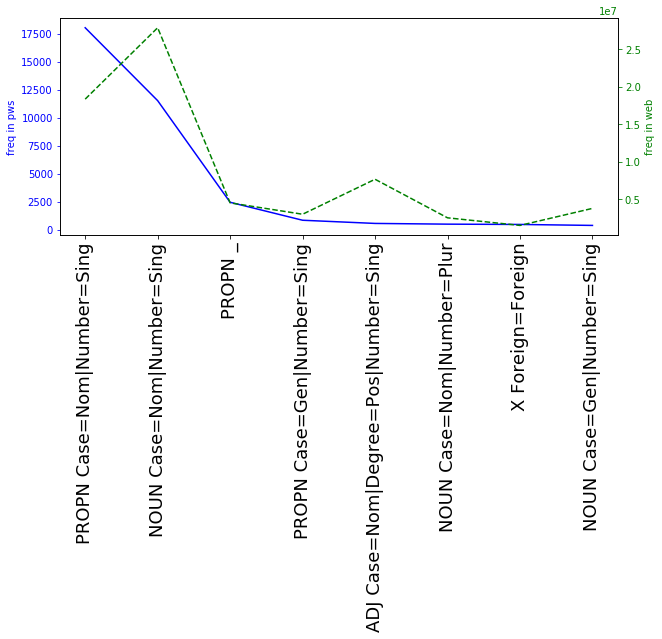

In [38]:
#https://matplotlib.org/gallery/api/two_scales.html

sample = 8
title = 'Frequencies of top ' + str(sample) + ' words used in passwords'
#x = [str(i) for i in dfsort['matched word'][:sample]]
#dfsort['freq in pws'][:sample].plot(legend=True, title = title, x=x);
#dfsort['freq in web'][:sample].plot(secondary_y=True, legend=True, sharex = True);

fig, ax1 = plt.subplots(figsize=(10,4))
x = [i for i, val in enumerate(dfa[:sample].index)]
x_ticks_labels = [str(i) for i in dfa[:sample].index]
y1 = dfa['freq in pws'][:sample]
print len(x), len(y1)
ax1.plot(x, y1, 'b-')
ax1.set_xlabel('')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('freq in pws', color='b')
ax1.tick_params('y', colors='b')
# Set number of ticks for x-axis
ax1.set_xticks(x)
# Set ticks labels for x-axis
ax1.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=18)

ax2 = ax1.twinx()
y2 = dfa['freq in web'][:sample]
ax2.plot(x, y2, 'g--')
ax2.set_ylabel('freq in web', color='g')
ax2.tick_params('y', colors='g')

#[str(i) for i in dfsort['matched word'][:sample]]

#fig.tight_layout()
plt.show()